In [ ]:
import numpy as np 
import pandas as pd 
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [ ]:
cdata = pd.read_csv('/content/drive/MyDrive/Cab EDA/Cab_Data.csv')
cid_data = pd.read_csv('/content/drive/MyDrive/Cab EDA/Customer_ID.csv')
tid_data = pd.read_csv('/content/drive/MyDrive/Cab EDA/Transaction_ID.csv')
citydata = pd.read_csv('/content/drive/MyDrive/Cab EDA/City.csv')

In [ ]:
cdata.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip
0,10000011,08-01-2016,Pink Cab,ATLANTA GA,30.45,370.95,313.635
1,10000012,06-01-2016,Pink Cab,ATLANTA GA,28.62,358.52,334.854
2,10000013,02-01-2016,Pink Cab,ATLANTA GA,9.04,125.20,97.632
3,10000014,07-01-2016,Pink Cab,ATLANTA GA,33.17,377.40,351.602
4,10000015,03-01-2016,Pink Cab,ATLANTA GA,8.73,114.62,97.776


In [ ]:
cid_data.head()

,Customer ID,Gender,Age,Income (USD/Month)
0,29290,Male,28,10813
1,27703,Male,27,9237
2,28712,Male,53,11242
3,28020,Male,23,23327
4,27182,Male,33,8536


In [ ]:
tid_data.head()


,Transaction ID,Customer ID,Payment_Mode
0,10000011,29290,Card
1,10000012,27703,Card
2,10000013,28712,Cash
3,10000014,28020,Cash
4,10000015,27182,Card


In [ ]:
citydata.head()

,City,Population,Users
0,NEW YORK NY,"8,405,837","302,149"
1,CHICAGO IL,"1,955,130","164,468"
2,LOS ANGELES CA,"1,595,037","144,132"
3,MIAMI FL,"1,339,155","17,675"
4,SILICON VALLEY,"1,177,609","27,247"


In [ ]:
cdata.info()
cid_data.info()
tid_data.info()
citydata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359392 entries, 0 to 359391
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Transaction ID  359392 non-null  int64  
 1   Date of Travel  359392 non-null  object 
 2   Company         359392 non-null  object 
 3   City            359392 non-null  object 
 4   KM Travelled    359392 non-null  float64
 5   Price Charged   359392 non-null  float64
 6   Cost of Trip    359392 non-null  float64
dtypes: float64(3), int64(1), object(3)
memory usage: 19.2+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49171 entries, 0 to 49170
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Customer ID         49171 non-null  int64 
 1   Gender              49171 non-null  object
 2   Age                 49171 non-null  int64 
 3   Income (USD/Month)  49171 non-null  int64 
dtypes: int64(3),

**1. Data Preprocessing**

Converting Date Type from Object to Datetime


In [ ]:
cdata['Date of Travel'] = pd.to_datetime(cdata['Date of Travel'], format='%d-%m-%Y')


In [ ]:
cdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359392 entries, 0 to 359391
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   Transaction ID  359392 non-null  int64         
 1   Date of Travel  359392 non-null  datetime64[ns]
 2   Company         359392 non-null  object        
 3   City            359392 non-null  object        
 4   KM Travelled    359392 non-null  float64       
 5   Price Charged   359392 non-null  float64       
 6   Cost of Trip    359392 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(2)
memory usage: 19.2+ MB


Renaming the Column Names

In [ ]:
for col in cdata.columns:
    if ' ' in col:
        cdata = cdata.rename(columns={col:col.replace(' ','_')})
for col in cid_data.columns:
    if ' ' in col:
        cid_data = cid_data.rename(columns={col:col.replace(' ','_')})
for col in tid_data.columns:
    if ' ' in col:
        tid_data = tid_data.rename(columns={col:col.replace(' ','_')})


Converting Date into Months and Years

In [ ]:
months=[]
years =[]
for i in range(len(cdata['Date_of_Travel'])):
    months.append(cdata['Date_of_Travel'][i].month)
    years.append(cdata['Date_of_Travel'][i].year)
cdata['Month'] = months
cdata['Year'] = years

Data Analysis

In [ ]:
cdata.Date_of_Travel.nunique()


1095

In [ ]:
cdata.groupby('Date_of_Travel').Transaction_ID.count().sort_values(ascending=False).head(10)


Date_of_Travel
2018-01-05    2022
2017-12-15    1123
2017-12-08    1100
2018-12-15    1086
2017-11-24    1085
2018-12-22    1084
2018-12-14    1076
2017-12-22    1042
2018-11-24    1037
2018-01-06    1032
Name: Transaction_ID, dtype: int64

In [ ]:
plot1 = cdata.groupby(['Month']).Transaction_ID.count()
plot1

Month
1     23174
2     18307
3     21646
4     21434
5     23701
6     24713
7     27676
8     31323
9     36859
10    40852
11    42700
12    47007
Name: Transaction_ID, dtype: int64

Number of Transactions in each Month

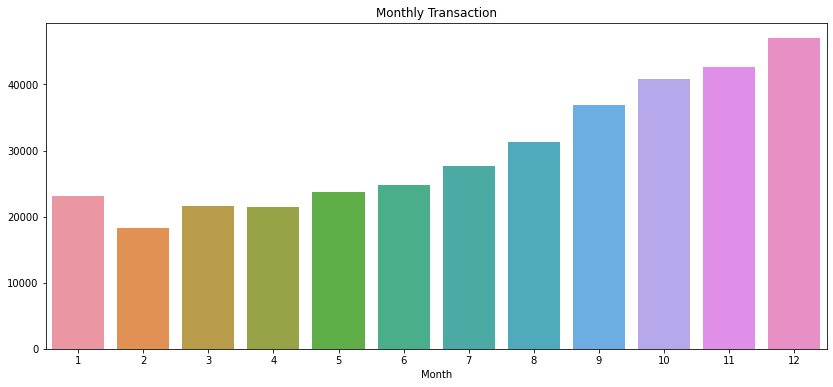

In [ ]:
plt.figure(figsize=(14,6))
sns.barplot(x=plot1.index,y=plot1.values)
plt.title('Monthly Transaction')
plt.show()

Number of Transactions for each Company

In [ ]:
cdata.groupby('Company').Transaction_ID.count()


Company
Pink Cab       84711
Yellow Cab    274681
Name: Transaction_ID, dtype: int64

In [ ]:
plot2 = cdata[cdata.Company=='Pink Cab'].groupby('Month').Transaction_ID.count()
plot2

Month
1      5057
2      3375
3      4223
4      4083
5      4960
6      5877
7      6590
8      7739
9      9658
10    10576
11    11005
12    11568
Name: Transaction_ID, dtype: int64

In [ ]:
plot3 = cdata[cdata.Company=='Yellow Cab'].groupby('Month').Transaction_ID.count()
plot3

Month
1     18117
2     14932
3     17423
4     17351
5     18741
6     18836
7     21086
8     23584
9     27201
10    30276
11    31695
12    35439
Name: Transaction_ID, dtype: int64

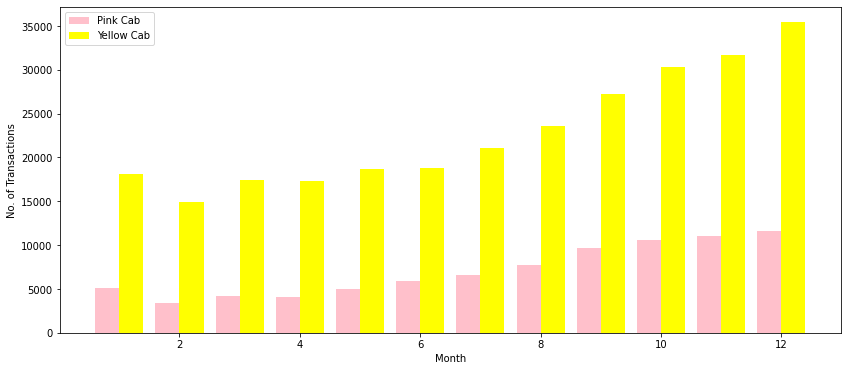

In [ ]:
plt.figure(figsize=(14,6))
ax = plt.subplot(111)
ax.bar(plot2.index-0.2, plot2.values, width=0.4, color='pink', align='center',label='Pink Cab')
ax.bar(plot2.index+0.2, plot3.values, width=0.4, color='yellow', align='center',label='Yellow Cab')
plt.ylabel('No. of Transactions')
plt.xlabel('Month')
plt.legend()
plt.show()

Combining Datasets

In [ ]:
left = cdata.set_index(['Transaction_ID'])
right = tid_data.set_index(['Transaction_ID'])
data = left.join(right)
data

,Date_of_Travel,Company,City,KM_Travelled,Price_Charged,Cost_of_Trip,Month,Year,Customer_ID,Payment_Mode
Transaction_ID,,,,,,,,,,
10000011,2016-01-08,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,1,2016,29290,Card
10000012,2016-01-06,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,1,2016,27703,Card
10000013,2016-01-02,Pink Cab,ATLANTA GA,9.04,125.20,97.6320,1,2016,28712,Cash
10000014,2016-01-07,Pink Cab,ATLANTA GA,33.17,377.40,351.6020,1,2016,28020,Cash
10000015,2016-01-03,Pink Cab,ATLANTA GA,8.73,114.62,97.7760,1,2016,27182,Card
...,...,...,...,...,...,...,...,...,...,...
10440101,2018-01-08,Yellow Cab,WASHINGTON DC,4.80,69.24,63.3600,1,2018,52392,Cash
10440104,2018-01-04,Yellow Cab,WASHINGTON DC,8.40,113.75,106.8480,1,2018,53286,Cash
10440105,2018-01-05,Yellow Cab,WASHINGTON DC,27.75,437.07,349.6500,1,2018,52265,Cash


In [ ]:
left = data.set_index([data.index,'Customer_ID'])
right = cid_data.set_index(['Customer_ID'])
data = left.join(right)
data

,,Date_of_Travel,Company,City,KM_Travelled,Price_Charged,Cost_of_Trip,Month,Year,Payment_Mode,Gender,Age,Income_(USD/Month)
Transaction_ID,Customer_ID,,,,,,,,,,,,
10000011,29290,2016-01-08,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,1,2016,Card,Male,28,10813
10000012,27703,2016-01-06,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,1,2016,Card,Male,27,9237
10000013,28712,2016-01-02,Pink Cab,ATLANTA GA,9.04,125.20,97.6320,1,2016,Cash,Male,53,11242
10000014,28020,2016-01-07,Pink Cab,ATLANTA GA,33.17,377.40,351.6020,1,2016,Cash,Male,23,23327
10000015,27182,2016-01-03,Pink Cab,ATLANTA GA,8.73,114.62,97.7760,1,2016,Card,Male,33,8536
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10440101,52392,2018-01-08,Yellow Cab,WASHINGTON DC,4.80,69.24,63.3600,1,2018,Cash,Male,24,15651
10440104,53286,2018-01-04,Yellow Cab,WASHINGTON DC,8.40,113.75,106.8480,1,2018,Cash,Male,32,6528
10440105,52265,2018-01-05,Yellow Cab,WASHINGTON DC,27.75,437.07,349.6500,1,2018,Cash,Male,56,7966


In [ ]:
data = data.reset_index()


In [ ]:
data = data.rename(columns={'Income_(USD/Month)':'Income'})


Total Number of Transactions within each City

In [ ]:
city_d = data.groupby('City').Transaction_ID.count()
city_d

City
ATLANTA GA         7557
AUSTIN TX          4896
BOSTON MA         29692
CHICAGO IL        56625
DALLAS TX          7017
DENVER CO          3825
LOS ANGELES CA    48033
MIAMI FL           6454
NASHVILLE TN       3010
NEW YORK NY       99885
ORANGE COUNTY      3982
PHOENIX AZ         2064
PITTSBURGH PA      1313
SACRAMENTO CA      2367
SAN DIEGO CA      20488
SEATTLE WA         7997
SILICON VALLEY     8519
TUCSON AZ          1931
WASHINGTON DC     43737
Name: Transaction_ID, dtype: int64

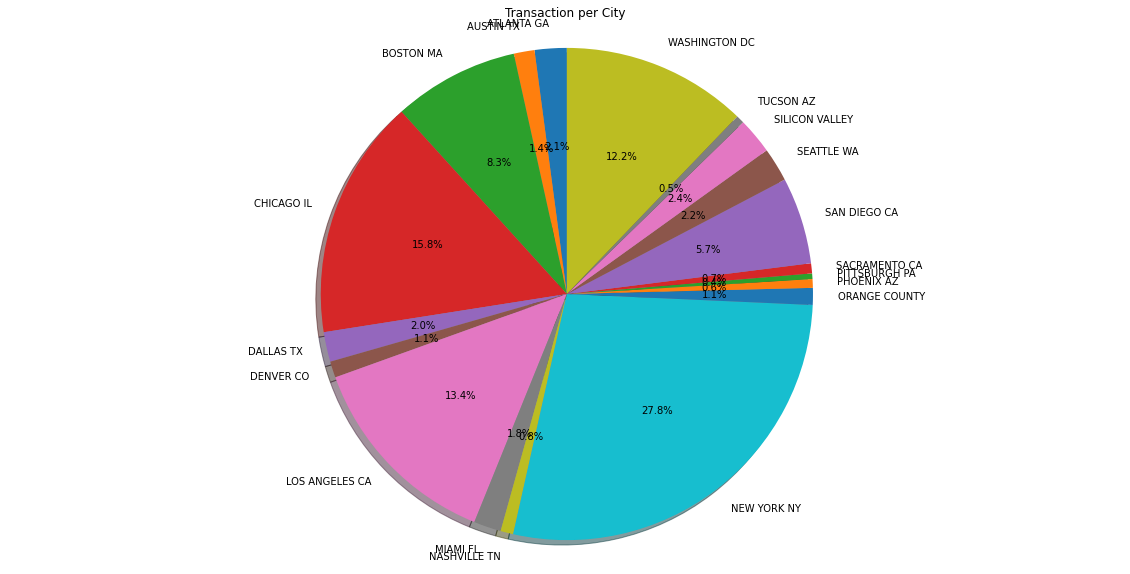

In [ ]:
labs = city_d.index
vals = city_d.values
figp, axp = plt.subplots(figsize=(20,10))
axp.pie(vals , labels=labs, autopct='%1.1f%%',shadow=True, startangle=90,)
axp.axis('equal')

plt.title('Transaction per City')
plt.show()

Average Price Charged for each Gender


In [ ]:
data.groupby(['Company','Gender']).Price_Charged.agg(['mean'])


mean
Company    Gender            
Pink Cab   Female  310.624823
           Male    310.940547
Yellow Cab Female  454.571538
           Male    460.821326

On an average, we can see that the Yellow Cab charges slightly higher price for males over females.

Relationship between KMs travelled and Cost of Trip for each City


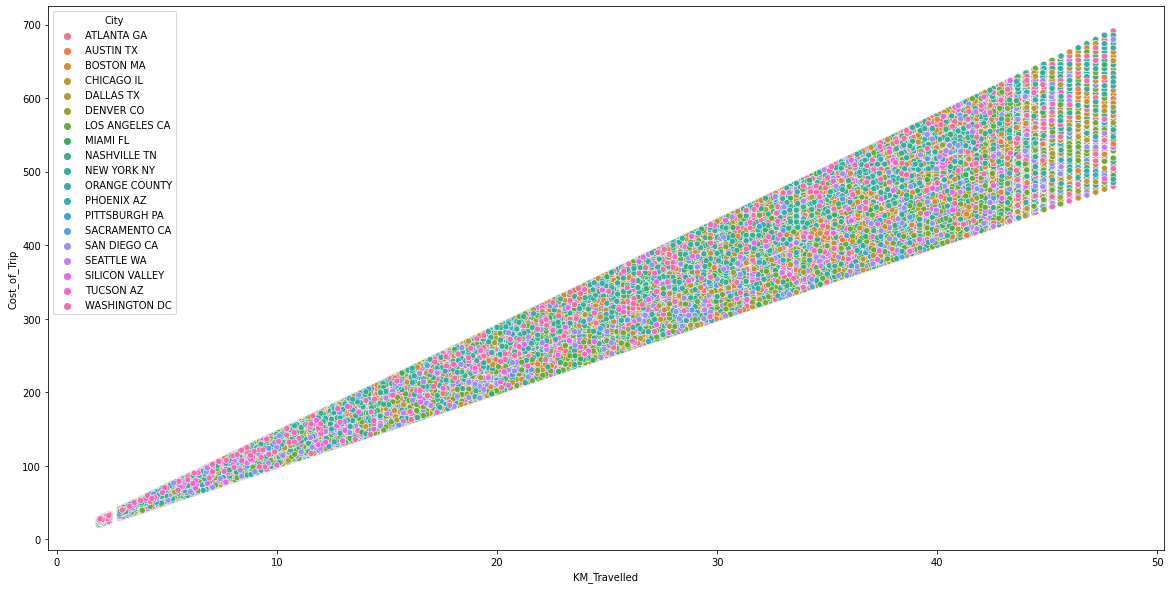

In [ ]:
plt.figure(figsize=(20,10))
sns.scatterplot(data=data, x="KM_Travelled", y="Cost_of_Trip", hue="City")

We can infer that the cost of trip doesn't depend on the city but is directly proportional to the number of KMs travelled.

Relationship between KMs travelled and Price Charged for each City


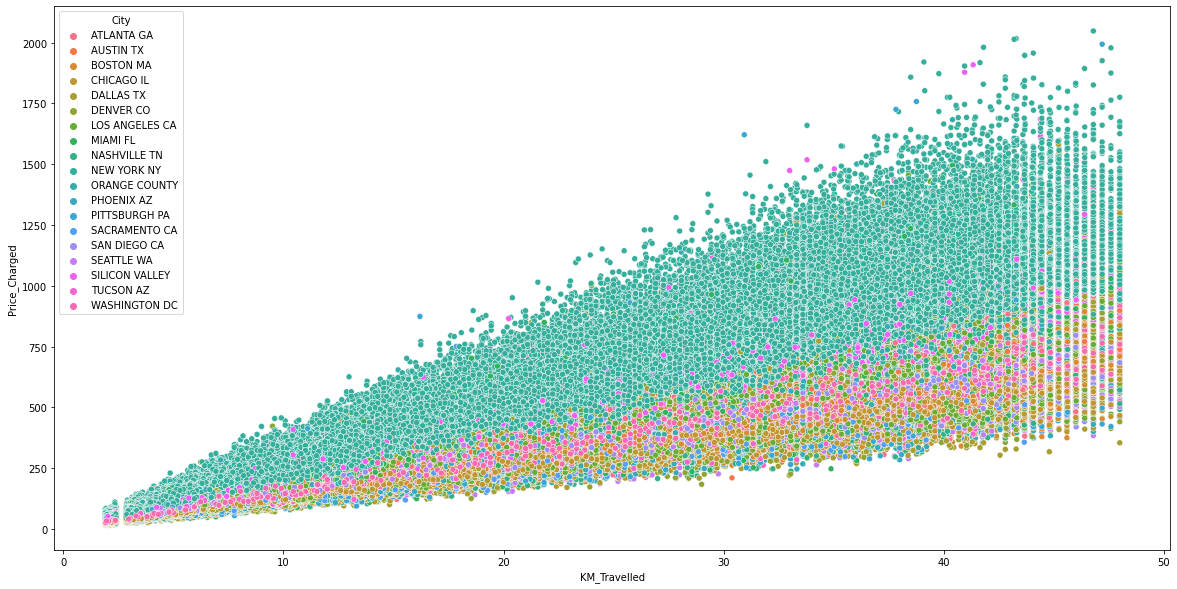

In [ ]:
plt.figure(figsize=(20,10))
sns.scatterplot(data=data, x="KM_Travelled", y="Price_Charged", hue="City")

From the above plot, we can infer that New York charges more price among all other cities. This can be associated with the population of the city.

Gender Analysis

In [ ]:
data.groupby(['Company','Gender']).Customer_ID.nunique()


Company     Gender
Pink Cab    Female    14819
            Male      17511
Yellow Cab  Female    18394
            Male      21502
Name: Customer_ID, dtype: int64

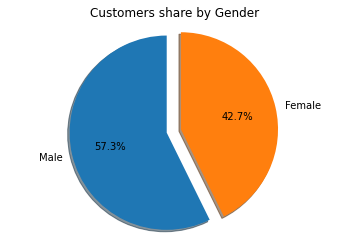

In [ ]:
labels1 = 'Male','Female' 
pct1 = [data[(data.Gender=='Male') ]['Gender'].count(),data[(data.Gender=='Female') ]['Gender'].count() ]
fig1, ax1 = plt.subplots()
explode = (0.15,0)
ax1.pie(pct1 ,explode = explode, labels=labels1, autopct='%1.1f%%',shadow=True, startangle=90)
ax1.axis('equal')

plt.title('Customers share by Gender')
plt.show()

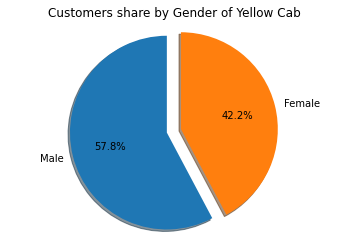

In [ ]:
labels2 = 'Male','Female' 
pct2 = [data[(data.Gender=='Male') & (data.Company=='Yellow Cab')]['Gender'].count(),data[(data.Gender=='Female') & (data.Company=='Yellow Cab')]['Gender'].count() ]
fig2, ax2 = plt.subplots()
ax2.pie(pct2 ,explode = explode, labels=labels2, autopct='%1.1f%%',shadow=True, startangle=90)
ax2.axis('equal')

plt.title('Customers share by Gender of Yellow Cab')
plt.show()

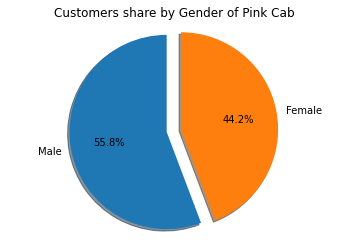

In [ ]:
labels3 = 'Male','Female' 
pct3 = [data[(data.Gender=='Male') & (data.Company=='Pink Cab')]['Gender'].count(),data[(data.Gender=='Female') & (data.Company=='Pink Cab')]['Gender'].count() ]
fig3, ax3 = plt.subplots()
ax3.pie(pct3 ,explode = explode, labels=labels3, autopct='%1.1f%%',shadow=True, startangle=90)
ax3.axis('equal')

plt.title('Customers share by Gender of Pink Cab')
plt.show()

Age Analysis

In [ ]:
plot_age = data.groupby('Age').Customer_ID.nunique()


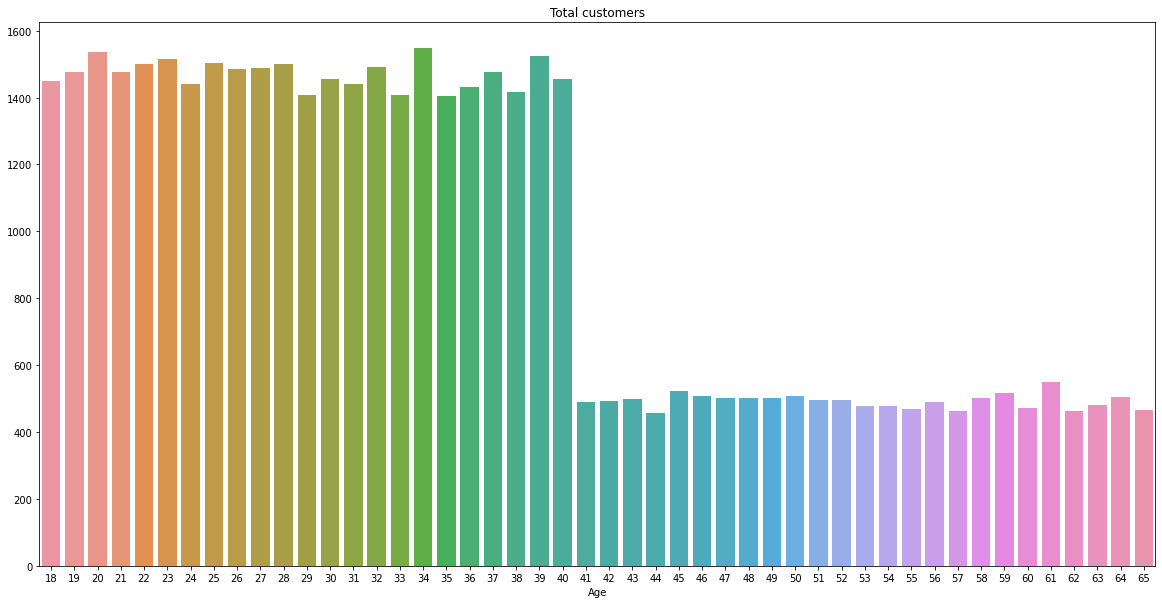

In [ ]:
plt.figure(figsize=(20,10))
sns.barplot(x=plot_age.index,y=plot_age.values)
plt.title('Total customers')
plt.show()

In [ ]:
plot_age2 = data.groupby('Age').Transaction_ID.count()


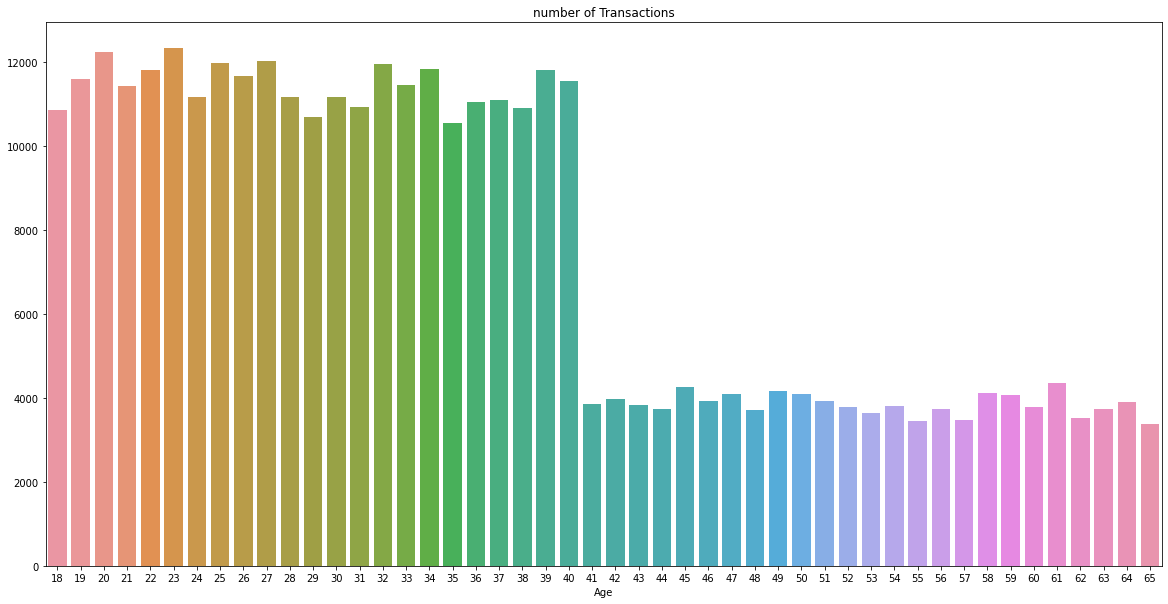

In [ ]:
plt.figure(figsize=(20,10))
sns.barplot(x=plot_age2.index,y=plot_age2.values)
plt.xlabel('Age')
plt.title('number of Transactions')
plt.show()

In [ ]:
data.groupby('Company').Age.mean()


Company
Pink Cab      35.322414
Yellow Cab    35.341112
Name: Age, dtype: float64

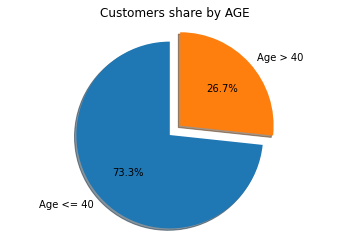

In [ ]:
labels1 = 'Age <= 40','Age > 40'
pct1 = [plot_age[plot_age2.index<=40].values.sum(),plot_age[plot_age2.index>40].values.sum()]
explode = (0.15,0)
fig1, ax1 = plt.subplots()
ax1.pie(pct1 , explode=explode, labels=labels1, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')

plt.title('Customers share by AGE')
plt.show()

In [ ]:
company_age = data.groupby(['Company','Age']).Customer_ID.agg(['nunique'])
company_age = company_age.reset_index()
company_age

,Company,Age,nunique
0,Pink Cab,18,1028
1,Pink Cab,19,1062
2,Pink Cab,20,1072
3,Pink Cab,21,1016
4,Pink Cab,22,1041
...,...,...,...
91,Yellow Cab,61,477
92,Yellow Cab,62,397
93,Yellow Cab,63,411
94,Yellow Cab,64,425


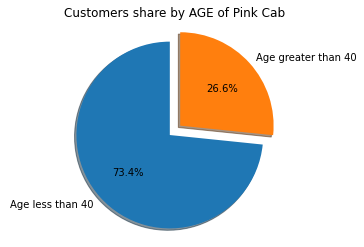

In [ ]:
labels2 = 'Age less than 40','Age greater than 40' 
pct2 = [company_age[(company_age.Age<=40) & (company_age.Company=='Pink Cab')]['nunique'].sum(),company_age[(company_age.Age>40) & (company_age.Company=='Pink Cab')]['nunique'].sum() ]
explode2 = (0.15,0)
fig2, ax2 = plt.subplots()
ax2.pie(pct2 , explode=explode2, labels=labels2, autopct='%1.1f%%',
shadow=True, startangle=90)
ax2.axis('equal')

plt.title('Customers share by AGE of Pink Cab')
plt.show()

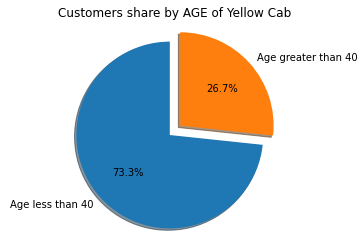

In [ ]:
labels3 = 'Age less than 40','Age greater than 40' 
pct3 = [company_age[(company_age.Age<=40) & (company_age.Company=='Yellow Cab')]['nunique'].sum(),company_age[(company_age.Age>40) & (company_age.Company=='Yellow Cab')]['nunique'].sum() ]
fig3, ax3 = plt.subplots()
ax3.pie(pct3 ,explode = explode, labels=labels3, autopct='%1.1f%%',shadow=True, startangle=90)
ax3.axis('equal')

plt.title('Customers share by AGE of Yellow Cab')
plt.show()

Profit Analysis

In [ ]:
data['Profit'] = (data['Price_Charged']-data['Cost_of_Trip'])


In [ ]:
data.head()


,Transaction_ID,Customer_ID,Date_of_Travel,Company,City,KM_Travelled,Price_Charged,Cost_of_Trip,Month,Year,Payment_Mode,Gender,Age,Income,Profit
0,10000011,29290,2016-01-08,Pink Cab,ATLANTA GA,30.45,370.95,313.635,1,2016,Card,Male,28,10813,57.315
1,10000012,27703,2016-01-06,Pink Cab,ATLANTA GA,28.62,358.52,334.854,1,2016,Card,Male,27,9237,23.666
2,10000013,28712,2016-01-02,Pink Cab,ATLANTA GA,9.04,125.20,97.632,1,2016,Cash,Male,53,11242,27.568
3,10000014,28020,2016-01-07,Pink Cab,ATLANTA GA,33.17,377.40,351.602,1,2016,Cash,Male,23,23327,25.798
4,10000015,27182,2016-01-03,Pink Cab,ATLANTA GA,8.73,114.62,97.776,1,2016,Card,Male,33,8536,16.844


In [ ]:
df = data[['KM_Travelled','Price_Charged','Cost_of_Trip','Month','Year','Age','Income','Profit']]
df.corr()

,KM_Travelled,Price_Charged,Cost_of_Trip,Month,Year,Age,Income,Profit
KM_Travelled,1.000000,0.835753,0.981848,-0.001903,-0.001072,-0.000369,-0.000544,0.462768
Price_Charged,0.835753,1.000000,0.859812,-0.061116,-0.036409,-0.003084,0.003228,0.864154
Cost_of_Trip,0.981848,0.859812,1.000000,-0.008370,-0.001773,-0.000189,-0.000633,0.486056
Month,-0.001903,-0.061116,-0.008370,1.000000,-0.030490,-0.002226,0.000322,-0.096352
Year,-0.001072,-0.036409,-0.001773,-0.030490,1.000000,-0.000579,-0.001617,-0.060567
Age,-0.000369,-0.003084,-0.000189,-0.002226,-0.000579,1.000000,0.003907,-0.005093
Income,-0.000544,0.003228,-0.000633,0.000322,-0.001617,0.003907,1.000000,0.006148
Profit,0.462768,0.864154,0.486056,-0.096352,-0.060567,-0.005093,0.006148,1.000000


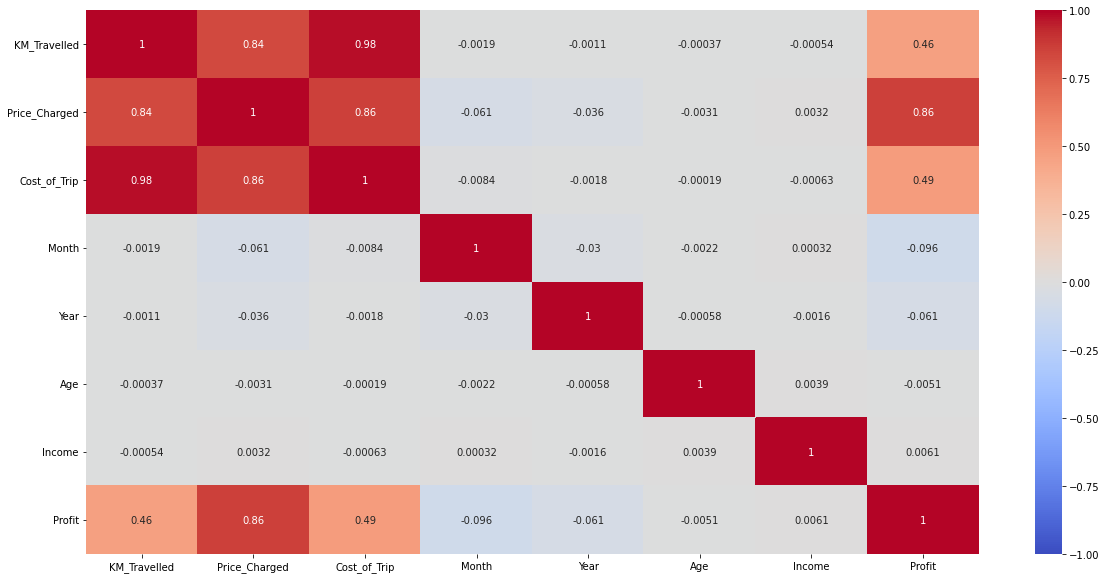

In [ ]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(),annot=True,vmin=-1,vmax=1,cmap='coolwarm')

In [ ]:
city_m = data[data.Month==12].groupby('City').Profit.mean()
city_m

City
ATLANTA GA         95.844236
AUSTIN TX          90.535487
BOSTON MA          61.158200
CHICAGO IL         49.166594
DALLAS TX         107.653009
DENVER CO         111.229893
LOS ANGELES CA     78.671170
MIAMI FL           98.341176
NASHVILLE TN       78.562585
NEW YORK NY       256.663241
ORANGE COUNTY      71.696141
PHOENIX AZ         72.779471
PITTSBURGH PA      50.946547
SACRAMENTO CA      23.995713
SAN DIEGO CA       67.587428
SEATTLE WA         75.043692
SILICON VALLEY    161.907324
TUCSON AZ          83.594826
WASHINGTON DC      60.778328
Name: Profit, dtype: float64

Cabs in New York seem to gain a greater profit in average

Profit in New York

In [ ]:
dt1 = data[(data.Company=='Pink Cab')&(data.City=='NEW YORK NY')].groupby(['Year','Month']).Profit.mean()
dt2 = data[(data.Company=='Yellow Cab')&(data.City=='NEW YORK NY')].groupby(['Year','Month']).Profit.mean()

In [ ]:
dd1 = pd.DataFrame({'Profit_pink':dt1.values,'Transactions_pink':data[data.Company=='Pink Cab'].groupby(['Year','Month']).Transaction_ID.count().values})

In [ ]:
dd2 = pd.DataFrame({'Profit_yellow':dt2.values,'Transactions_yellow':data[data.Company=='Yellow Cab'].groupby(['Year','Month']).Transaction_ID.count().values})

In [ ]:
dd1.corr()

,Profit_pink,Transactions_pink
Profit_pink,1.000000,0.499074
Transactions_pink,0.499074,1.000000


In [ ]:
dd2.corr()

,Profit_yellow,Transactions_yellow
Profit_yellow,1.000000,-0.761895
Transactions_yellow,-0.761895,1.000000


Monthly Profit of Pink Cab

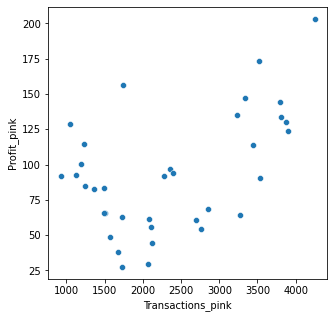

In [ ]:
plt.figure(figsize=(5,5))
sns.scatterplot(x=dd1.Transactions_pink,y=dd1.Profit_pink)

With the increase in the number of transactions, Pink Cab tend to increase their profit.

Profit for Yellow Cabs

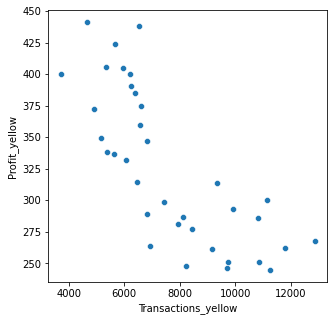

In [ ]:
plt.figure(figsize=(5,5))
sns.scatterplot(x=dd2.Transactions_yellow,y=dd2.Profit_yellow)

With the increase in the number of transactions, Yellow Cab get lesser profits. This means that they charge less when they have a lot of demand. This isn't usually done but with Yellow Cab following such a scheme, it has to be well appreciated and is a good business model.

Female Customer Share

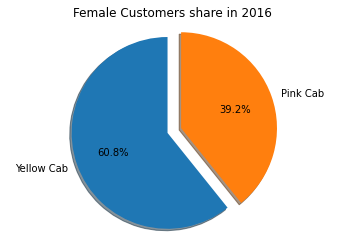

In [ ]:
labels = 'Yellow Cab','Pink Cab' 
pct = [data[(data.Year==2016) & (data.Company=='Yellow Cab') &(data.Gender=='Male') ]['Customer_ID'].nunique(),data[(data.Year==2016) & (data.Company=='Pink Cab') & (data.Gender=='Male')]['Customer_ID'].nunique() ]
fig, ax = plt.subplots()
ax.pie(pct ,explode = explode, labels=labels, autopct='%1.1f%%',shadow=True, startangle=90)
ax.axis('equal')

plt.title('Female Customers share in 2016 ')
plt.show()

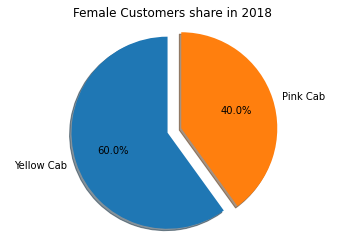

In [ ]:
labels = 'Yellow Cab','Pink Cab' 
pct = [data[(data.Year==2018) & (data.Company=='Yellow Cab') &(data.Gender=='Male') ]['Customer_ID'].nunique(),data[(data.Year==2018) & (data.Company=='Pink Cab') & (data.Gender=='Male')]['Customer_ID'].nunique() ]
fig, ax = plt.subplots()
ax.pie(pct ,explode = explode, labels=labels, autopct='%1.1f%%',shadow=True, startangle=90)
ax.axis('equal')

plt.title('Female Customers share in 2018 ')
plt.show()

Old Customers Share

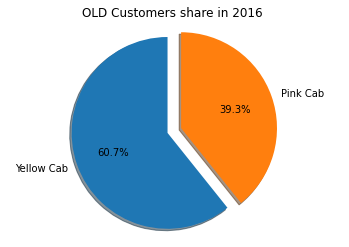

In [ ]:
labels = 'Yellow Cab','Pink Cab' 
pct = [data[(data.Year==2016) & (data.Company=='Yellow Cab') &(data.Age>45) ]['Customer_ID'].nunique(),data[(data.Year==2016) & (data.Company=='Pink Cab') & (data.Age>45)]['Customer_ID'].nunique() ]
fig, ax = plt.subplots()
ax.pie(pct ,explode = explode, labels=labels, autopct='%1.1f%%',shadow=True, startangle=90)
ax.axis('equal')

plt.title('OLD Customers share in 2016 ')
plt.show()

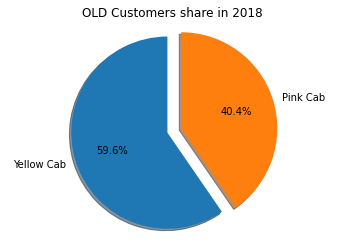

In [ ]:
labels = 'Yellow Cab','Pink Cab' 
pct = [data[(data.Year==2018) & (data.Company=='Yellow Cab') &(data.Age>45) ]['Customer_ID'].nunique(),data[(data.Year==2018) & (data.Company=='Pink Cab') & (data.Age>45)]['Customer_ID'].nunique() ]
fig, ax = plt.subplots()
ax.pie(pct ,explode = explode, labels=labels, autopct='%1.1f%%',shadow=True, startangle=90)
ax.axis('equal')

plt.title('OLD Customers share in 2018 ')
plt.show()

**Overall Analysis**

We can conclude the following from the analysis:

1. Yellow Cab even though saturated in market haven't lost much business to Pink Cabs even with Higher profits.
2. Pink Cab has potential and can grow much more if implemented some policies better
3. Yellow Cab increases its margins when there are less customers and decrease when there is season, and I beleive thats a good business model
4. I believe that Yellow cab is gonna maintain its monopoly in the market for a longer period of time
5. Yellow Cab have policies for charging less to Old age and female customers